<a href="https://colab.research.google.com/github/ahmedelalaoui142/Amazon_food_reviews/blob/main/Amazon_Food_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0- Installing Dependencies

In [1]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
100% 242M/242M [00:05<00:00, 63.4MB/s]
100% 242M/242M [00:05<00:00, 45.9MB/s]


In [2]:
!unzip /content/amazon-fine-food-reviews.zip -d /content/amazon-fine-food-reviews

Archive:  /content/amazon-fine-food-reviews.zip
  inflating: /content/amazon-fine-food-reviews/Reviews.csv  
  inflating: /content/amazon-fine-food-reviews/database.sqlite  
  inflating: /content/amazon-fine-food-reviews/hashes.txt  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.0 MB/s eta 0:00:00


In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [7]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [8]:
from transformers import pipeline

## 1- Reading Data and Basic Exploartory Data Analysis

In [9]:
df = pd.read_csv('/content/amazon-fine-food-reviews/Reviews.csv')

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.shape # Number of rows, Number of Columns

(568454, 10)

In [12]:
Score_count = df['Score'].value_counts().sort_index() # Count the frequence of each score in our Data
Score_count

,count
Score,
1,52268
2,29769
3,42640
4,80655
5,363122


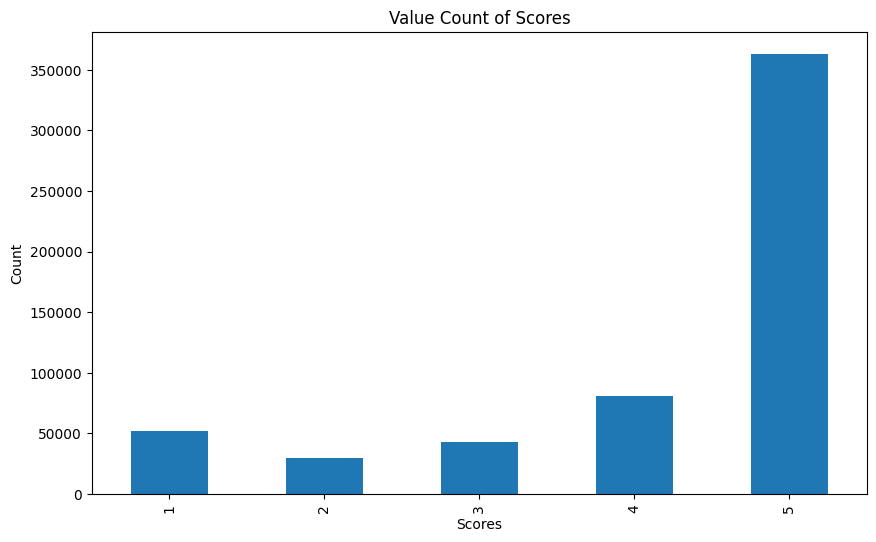

In [13]:
# Plotting a barchart of the frequence of each Score
plt.figure(figsize=(10,6))
Score_count.plot(kind='bar')
plt.xlabel('Scores')
plt.ylabel('Count')
plt.title('Value Count of Scores')
plt.show()

## 2- Tokens, POS-Tags and Entities

In [14]:
# let's take a random Text in our data
n = np.random.randint(0,len(df))
example = df['Text'][n]

In [15]:
print(example)

Currently on a low carb diet and my doctor recommended me PB2 as an alternative to regular PB. This Peanut Butter is SO GOOD that I think I would still buy it even after I am off the diet. I love how u get tiny chunks of chocolate, which makes me feel compensated from all the diet restrictions.<br />Highly recommended!!!!!! Please note, I did not get it form this seller though, but I wanted to give a review on the peanut butter itself!


Tokenization breaks down the text into meaningful units that can be analyzed individually.

In [16]:
tokens = nltk.word_tokenize(example) # Split the string into tokens ;individual words and punctiation marks.

In [17]:
tokens[:10]

['Currently',
 'on',
 'a',
 'low',
 'carb',
 'diet',
 'and',
 'my',
 'doctor',
 'recommended']

The pos_tag function is used to assign part-of-speech (POS) tags to each token in a list. These tas identify the grammatical role of each word in a sentence.
https://www.learntek.org/blog/categorizing-pos-tagging-nltk-python/

In [18]:
tagged = nltk.pos_tag(tokens) # Assign POS tags to each token

In [19]:
tagged[:10]

[('Currently', 'RB'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('low', 'JJ'),
 ('carb', 'NN'),
 ('diet', 'NN'),
 ('and', 'CC'),
 ('my', 'PRP$'),
 ('doctor', 'NN'),
 ('recommended', 'VBD')]


*   The ne_chunk function is used to identify named entities in text by grouping and labeling words that refer to proper names of people, organizations, locations... We call this process Named Entity Recognetion (NER).
*   It takes POS-tagged Tokens and returns a Tree Object where named entities are grouped and labeled with their entity type ( Person, Geopolitical Entity, Organizations...)



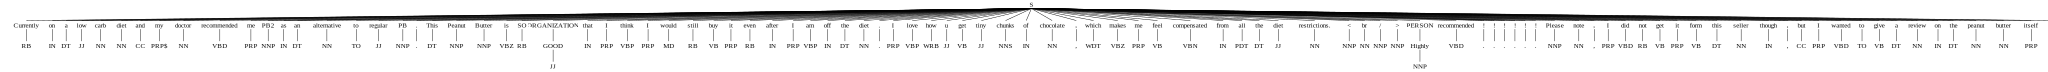

In [20]:
entities = nltk.chunk.ne_chunk(tagged)
entities

## 3- VADER Sentiment Analysis




*   The Sentiemnt Analysis Analyzer (SIA) uses VADER ( Valence Aware Dictionary and Sentiment Reasoner) model for sentiment analysis, VADER is a rule-based sentiment analysis tool that is designed to detect sentiment in social media text but performs well on other types of text as well.
*   SIA is built on VADER's lexicon and rules which capture nuanced sentiments, including slang, emoticons, abbreviations, and exclamation marks



In [21]:
sia = SentimentIntensityAnalyzer()

Polarity Scores are useful to analyze the sentiment of a given text and that is via the four scores :


*   neg (Negative): Probability of the text being negative.
*   pos (Positive): Probability of the text being positive.
*   neu (Neutral): Probability of the text being neutral.
*   coumpound : The overall score normalized between -1 ( Very Negative )  and +1 ( Very Positive)






In [22]:
sia.polarity_scores(example)

{'neg': 0.019, 'neu': 0.86, 'pos': 0.12, 'compound': 0.7962}

In the code bellow, we used tqdm library, it's a Python package that display progress bars in loops, making it easy to track the progress of long-running tasks.

In [23]:
res = {}
for i,row in tqdm(df.iterrows(),total = len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid]= sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
568450,0.072,0.600,0.327,0.8589
568451,0.190,0.697,0.114,-0.4848
568452,0.037,0.884,0.078,0.4352
568453,0.041,0.506,0.452,0.9717


In [25]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df,how='left')

In [26]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


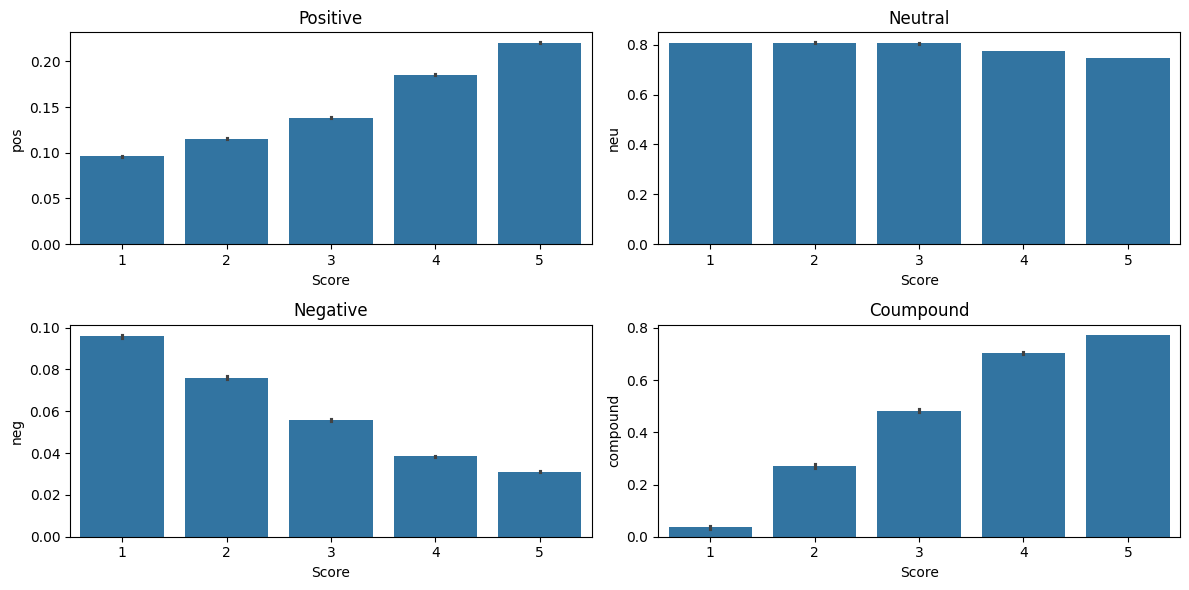

In [27]:
fig, axs = plt.subplots(2,2,figsize=(12,6))
sns.barplot(data=vaders, x ='Score', y='pos', ax=axs[0,0])
sns.barplot(data=vaders, x ='Score', y='neu', ax=axs[0,1])
sns.barplot(data=vaders, x ='Score', y='neg', ax=axs[1,0])
sns.barplot(data = vaders, x='Score',y='compound', ax = axs[1,1])
axs[0,0].set_title('Positive')
axs[0,1].set_title('Neutral')
axs[1,0].set_title('Negative')
axs[1,1].set_title('Coumpound')
plt.tight_layout()
plt.show()

## 4- RoBERTa Sentiment Analysis

RoBERTa : Robustly Optimized BERT Pretraining Approach is NLP Model developed by Huggingface, Bulding on BERT ( Bidirectional Encoder Representations from Transformers). It improves upon BERT by training on more data for a longer time and by removing certain pretraining constraints, making it more powerful and effective for sentiment analysis.

In [28]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment" # a Roberta Model fine-tuned for sentiment analysis on Twitter data
Tokenizer = AutoTokenizer.from_pretrained(Model) # loads tokenizer specifically tailored to work with the twitter base sentiment model.
model = AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [29]:
encoded_text = Tokenizer(example, return_tensors='pt')
output = model(**encoded_text)

In [30]:
scores = output[0][0].detach().numpy()

In [31]:
scores

array([-1.826259 , -0.6025518,  3.0910873], dtype=float32)

In [32]:
scores = softmax(scores)
scores

array([0.00709022, 0.02410511, 0.9688046 ], dtype=float32)

In [33]:
def polarity_scores_roberta(example):
  encoded_text = Tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
  }
  return scores_dict

In [34]:
df = df.head(500)

In [35]:
res = {}
for i,row in tqdm(df.iterrows(),total = len(df)):
  try :
    text = row['Text']
    myid = row['Id']
    vader_result= sia.polarity_scores(text)
    vader_result_rename= {}
    for key, value in vader_result.items():
      vader_result_rename[f'vader_{key}'] = value
    roberta_result = polarity_scores_roberta(text)
    all = {**vader_result_rename,**roberta_result}
    res[myid] = all
  except RuntimeError:
    print(f'Roberta Brokes for {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Roberta Brokes for 83
Roberta Brokes for 187


In [36]:
res = pd.DataFrame(res).T
res = res.reset_index().rename(columns= {'index':'Id'})
res = res.merge(df,how = 'left')

In [37]:
res

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940396,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


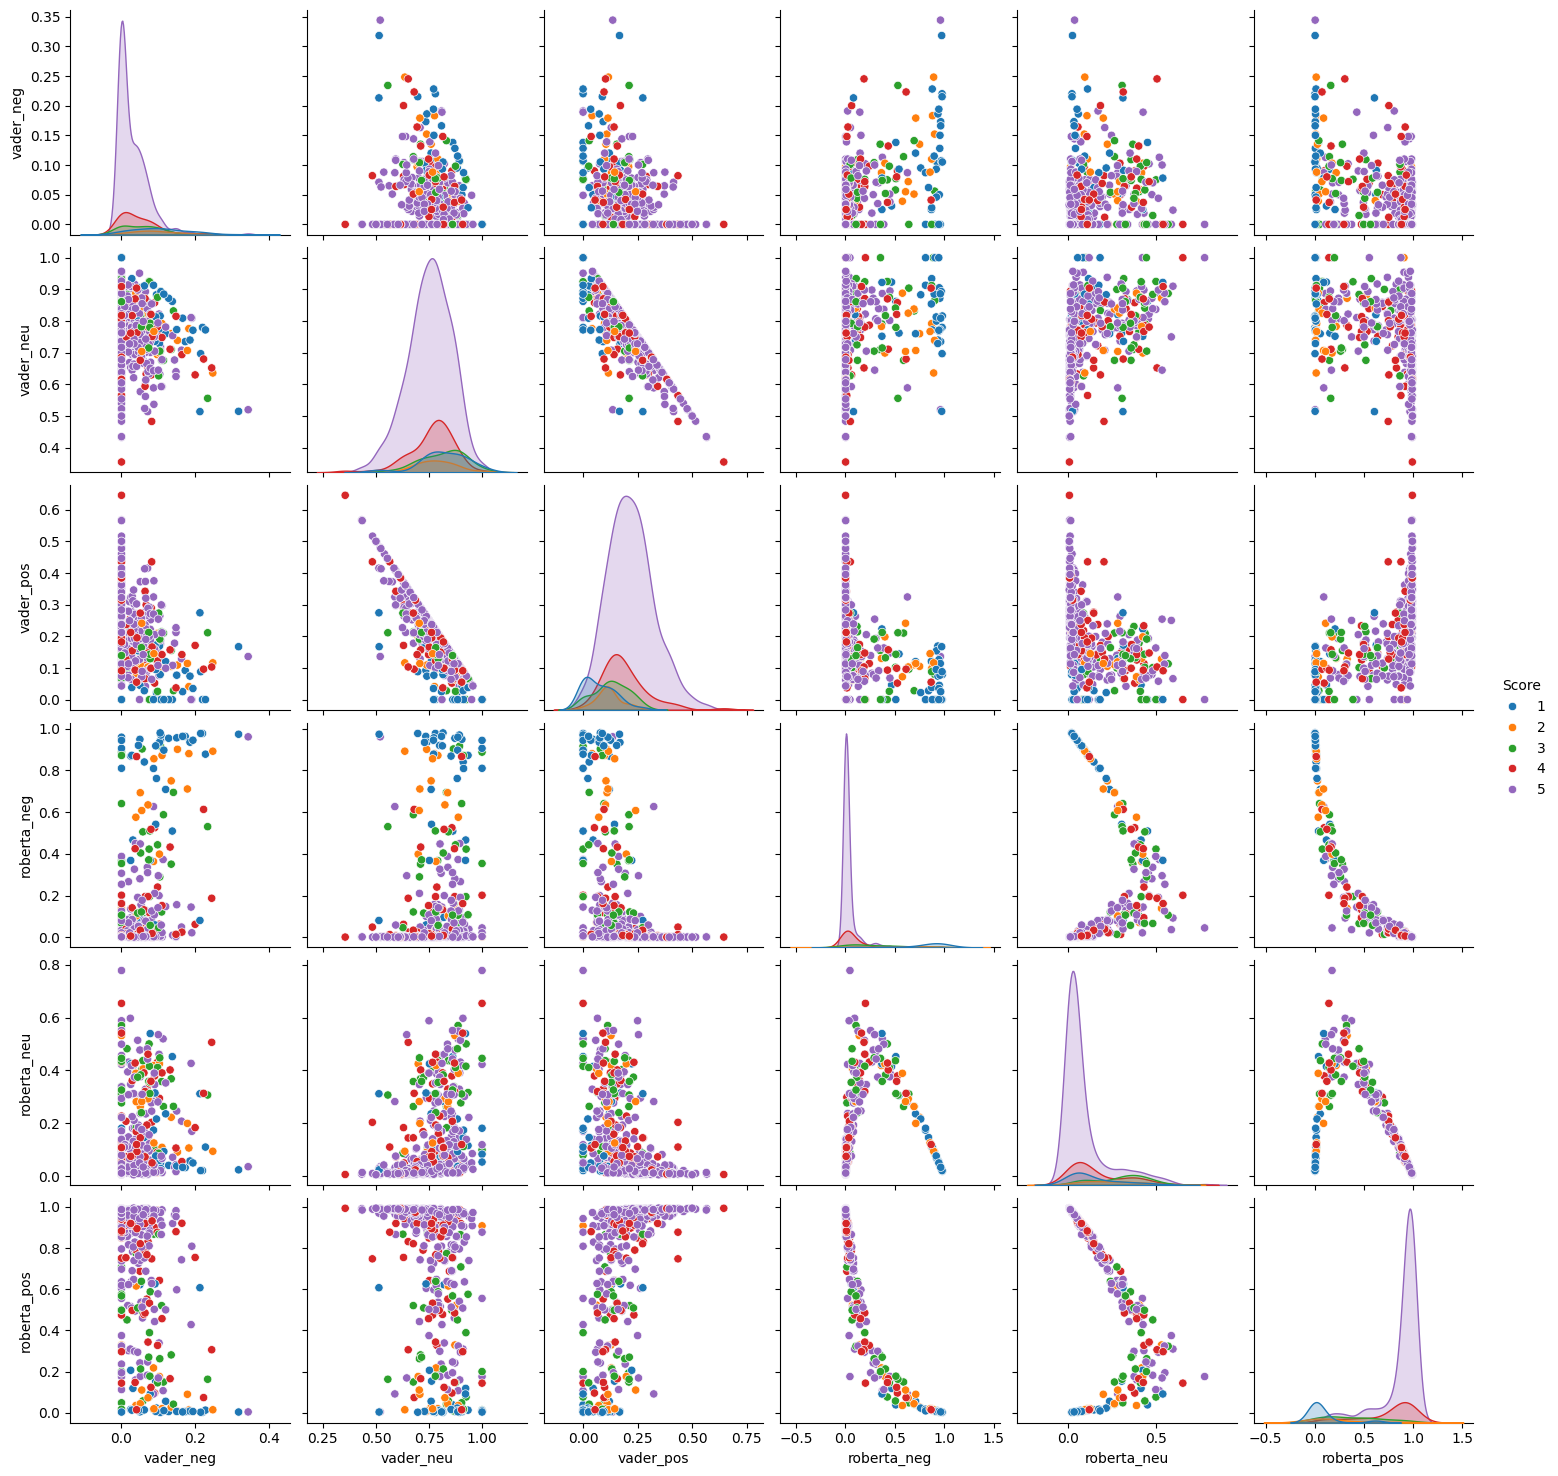

In [39]:
# compare scores between models
sns.pairplot(data = res, vars = ['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'Score', palette='tab10')
plt.show()

## 5 - Sentiment Analysis with Hugging Face Pipeline

In [40]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [44]:
res = {}
for i,row in tqdm(df.iterrows(),total = len(df)):
  try :
    text = row['Text']
    myid = row['Id']
    vader_result= sia.polarity_scores(text)
    vader_result_rename= {}
    for key, value in vader_result.items():
      vader_result_rename[f'vader_{key}'] = value
    roberta_result = polarity_scores_roberta(text)
    pipeline_result = sent_pipeline(text)[0]
    pipeline_result_rename= {}
    for key,value in pipeline_result.items():
      if key =='score':
        if pipeline_result['label'] == 'NEGATIVE':
          pipeline_result_rename['pipe_score'] = -1 * value
        else :
          pipeline_result_rename['pipe_score'] =  value
    all = {**vader_result_rename,**roberta_result,**pipeline_result_rename}
    res[myid] = all
  except RuntimeError:
    print(f'Roberta Brokes for {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Roberta Brokes for 83
Roberta Brokes for 187


In [45]:
res = pd.DataFrame(res).T
res = res.reset_index().rename(columns= {'index':'Id'})
res = res.merge(df,how = 'left')

In [46]:
res

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,pipe_score,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940396,0.998385,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,-0.999525,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,0.999765,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,0.999153,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,0.998708,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,0.999860,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,0.999754,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,0.999425,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,0.992952,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."
